**Table of contents**

* [Introduction](#Introduction)
* [Preparation](#Preparation)
  * [Dependencies](#Dependencies)
  * [Load the datasets](#Load-the-datasets)
* [ARIMA](#ARIMA)
* [Time series data exploration](#Time-series-data-exploration)
  * [Distribution of sales](#Distribution-of-sales)
  * [How does sales vary across stores](#How-does-sales-vary-across-stores)
  * [How does sales vary across items](#How-does-sales-vary-across-items)
  * [Time-series visualization of the sales](#Time-series-visualization-of-the-sales)

# Introduction

Kernel for the [demand forecasting](https://www.kaggle.com/c/demand-forecasting-kernels-only) Kaggle competition.

Answer some of the questions posed:

* What's the best way to deal with seasonality?
* Should stores be modeled separately, or can you pool them together?
* Does deep learning work better than ARIMA?
* Can either beat xgboost?



  
  # Preparation
  
  ## Dependencies

In [1]:
"""
Dependencies

python version: 3.6.4
Pandas version: 0.22.0
Numpy version: 1.14.2
matplotlib version: 2.1.0
Seaborn version: 0.8.1
Plotly version: 2.5.0
LightGBM version: 2.1.0
Sklearn version: 0.19.1
"""

!pip install matplotlib==2.1.0
!pip install seaborn==0.8.1
!pip install plotly==2.5.0

You should consider upgrading via the 'C:\Users\Heisen\Desktop\Project\Elutions\store-demand-forecast-model\.venv\Scripts\python.exe -m pip install --upgrade pip' command.



  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached seaborn-0.8.1.tar.gz (178 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for seaborn: filename=seaborn-0.8.1-py3-none-any.whl size=184850 sha256=10e090df2377291aa60e549181ef0d6afd972cbe224366d3ab325a3191365f86
  Stored in directory: c:\users\heisen\appdata\local\pip\cache\wheels\b4\8a\f8\954cba570daa622117cc602e6e2cd97b15233d213546348f6e
Successfully built seaborn


You should consider upgrading via the 'C:\Users\Heisen\Desktop\Project\Elutions\store-demand-forecast-model\.venv\Scripts\python.exe -m pip install --upgrade pip' command.


  Using cached plotly-2.5.0.tar.gz (24.9 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached requests-2.27.1-py2.py3-none-any.whl (63 kB)
  Using cached idna-3.7-py3-none-any.whl (66 kB)
  Using cached charset_normalizer-2.0.12-py3-none-any.whl (39 kB)
  Using cached certifi-2024.7.4-py3-none-any.whl (162 kB)
  Created wheel for plotly: filename=plotly-2.5.0-py3-none-any.whl size=24951982 sha256=e06a4c22131895a699bf52c94fc112d99a4736be97d7615bebec4bf6e158db26
  Stored in directory: c:\users\heisen\appdata\local\pip\cache\wheels\a2\c2\28\55a515057c71d6ba2284bdb40087353c0bc4adaf381d00ee34
Successfully built plotly


You should consider upgrading via the 'C:\Users\Heisen\Desktop\Project\Elutions\store-demand-forecast-model\.venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [3]:
# Print versions of packages to validate
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import lightgbm as lgb
import sklearn

import sys

print(f'python version: {sys.version}')

print(f'Pandas version: {pd.__version__}')
print(f'Numpy version: {np.__version__}')
print(f'LightGBM version: {lgb.__version__}')
print(f'Sklearn version: {sklearn.__version__}')

print(f'matplotlib version: {plt.matplotlib.__version__}')
print(f'Seaborn version: {sns.__version__}')
print(f'Plotly version: {plotly.__version__}')

python version: 3.6.4 (v3.6.4:d48eceb, Dec 19 2017, 06:54:40) [MSC v.1900 64 bit (AMD64)]
Pandas version: 0.22.0
Numpy version: 1.19.5
LightGBM version: 2.1.0
Sklearn version: 0.19.1
matplotlib version: 2.1.0
Seaborn version: 0.8.1
Plotly version: 2.5.0


In [4]:
import pandas as pd
import numpy as np
# from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
sns.set()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
# import statsmodels.api as sm
# import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import train_test_split

import warnings
# import the_module_that_warns

warnings.filterwarnings("ignore")

# from fbprophet import Prophet

## Load the datasets

In [25]:
# Input data files are available in the "../input/" directory.
# First let us load the datasets into different Dataframes
def load_data(datapath):
    data = pd.read_csv(datapath)
   # Dimensions
    print('Shape:', data.shape)
    # Set of features we have are: date, store, and item
    display(data.sample(10))
    return data
    
    
train_df = load_data('../data/train.csv')
test_df = load_data('../data/test.csv')
sample_df = load_data('../data/sample_submission.csv')

Shape: (913000, 4)


,date,store,item,sales
288258,2017-04-26,8,16,34
558074,2016-02-19,6,31,25
540164,2017-02-03,6,30,30
877383,2015-06-23,1,49,38
450954,2017-10-25,7,25,53
410184,2016-03-06,5,23,30
206032,2017-03-01,3,12,71
627136,2015-03-30,4,35,56
62510,2014-03-03,5,4,9
454204,2016-09-18,9,25,112


Shape: (45000, 4)


,id,date,store,item
4495,4495,2018-03-27,10,5
10852,10852,2018-02-22,1,13
22043,22043,2018-03-25,5,25
44885,44885,2018-03-07,9,50
40448,40448,2018-02-08,10,45
25676,25676,2018-01-27,6,29
38271,38271,2018-01-22,6,43
14740,14740,2018-03-12,4,17
20657,20657,2018-02-17,10,23
23277,23277,2018-02-27,9,26


Shape: (45000, 2)


,id,sales
17855,17855,52
28076,28076,52
41915,41915,52
18626,18626,52
33261,33261,52
44327,44327,52
2246,2246,52
23334,23334,52
28101,28101,52
38372,38372,52


# Time series data exploration

(This portion was [forked](https://www.kaggle.com/danofer/getting-started-with-time-series-features).)

The goal of this kernel is data exploration of a time-series sales data of store items.   
The tools `pandas`, `matplotlib`  and, `plotly`  are used for slicing & dicing the data and visualizations.


## Distribution of sales
Now let us understand how the sales varies across all the items in all the stores

In [6]:
# Sales distribution across the train data
def sales_dist(data):
    """
        Sales_dist used for Checing Sales Distribution.
        data :  contain data frame which contain sales data
    """
    sales_df = data.copy(deep=True)
    sales_df['sales_bins'] = pd.cut(sales_df.sales, [0, 50, 100, 150, 200, 250])
    print('Max sale:', sales_df.sales.max())
    print('Min sale:', sales_df.sales.min())
    print('Avg sale:', sales_df.sales.mean())
    print()
    return sales_df

sales_df = sales_dist(train_df)

# Total number of data points
total_points = pd.value_counts(sales_df.sales_bins).sum()
print('Sales bucket v/s Total percentage:')
display(pd.value_counts(sales_df.sales_bins).apply(lambda s: (s/total_points)*100))

Max sale: 231
Min sale: 0
Avg sale: 52.250286966046005

Sales bucket v/s Total percentage:


(0, 50]       54.591407
(50, 100]     38.388322
(100, 150]     6.709974
(150, 200]     0.308544
(200, 250]     0.001752
Name: sales_bins, dtype: float64

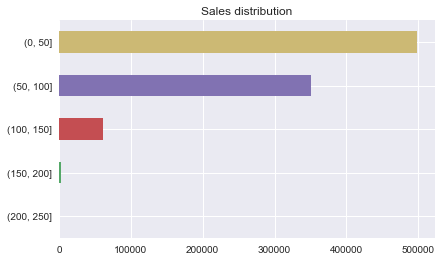

In [7]:
# Let us visualize the same
sales_count = pd.value_counts(sales_df.sales_bins)
sales_count.sort_values(ascending=True).plot(kind='barh', title='Sales distribution', );
# sns.countplot(sales_count)

As we can see, almost 92% of sales are less than 100. Max, min and average sales are 231, 0 and 52.25 respectively.   
So any prediction model has to deal with the skewness in the data appropriately. 

## How does sales vary across stores
Let us get a overview of sales distribution in the whole data.

sales                                                         \
item          1          2          3          4          5          6    
store                                                                     
1      19.971522  53.148959  33.208105  19.956188  16.612815  53.060789   
2      28.173604  75.316539  46.992333  28.234940  23.540526  74.945235   
3      25.070099  66.804491  41.771084  25.116101  20.857612  67.007119   
4      22.938664  61.715225  38.548193  23.086528  19.525192  61.270537   
5      16.739321  44.488499  27.835706  16.776561  14.086528  44.564622   
6      16.717963  44.533954  27.811062  16.754107  13.893209  44.503834   
7      15.159365  40.717963  25.531216  15.358160  12.733844  40.703724   
8      26.983571  71.656627  45.076123  26.948521  22.427711  71.958379   
9      23.325849  61.792442  38.535049  23.150055  19.272180  61.412377   
10     24.736035  65.566813  41.113363  24.721249  20.637459  65.612267   

                                                     ...                 \
item          7          8          9          10    ...             41   
store                                                ...                  
1      52.783680  69.472070  46.504929  66.354326    ...      20.002738   
2      75.058598  99.090361  65.478094  94.097481    ...      28.069551   
3      66.647864  87.517525  58.486857  83.387733    ...      24.989047   
4      61.625411  80.819825  54.043812  77.047645    ...      23.168127   
5      44.535597  58.565717  38.837349  55.509858    ...      16.830778   
6      44.599124  58.385542  39.460022  55.565170    ...      16.607338   
7      40.709748  53.723987  35.901972  51.156627    ...      15.471522   
8      71.730559  94.461117  63.193319  89.818182    ...      27.036145   
9      61.812158  81.287514  54.105696  77.105148    ...      23.191128   
10     65.807777  86.176889  57.886637  82.232202    ...      24.654984   

                                                                          \
item          42         43         44          45         46         47   
store                                                                      
1      33.105696  46.242607  26.594195   72.720701  52.845016  19.814348   
2      47.368018  65.785323  37.785871  103.381161  75.219606  28.187842   
3      41.797371  58.197700  33.386090   91.851041  66.748083  25.120482   
4      38.539978  54.018620  30.952355   84.687295  61.420044  23.114458   
5      27.730559  39.163198  22.415115   61.427163  44.734940  16.699343   
6      27.893209  39.034502  22.322563   61.142935  44.539978  16.708653   
7      25.435926  35.426068  20.446331   55.905805  40.828587  15.479189   
8      45.144031  62.980285  36.194414   98.941402  72.004929  27.150055   
9      38.643483  54.152793  30.968237   85.093647  62.010953  23.003286   
10     41.222892  57.942497  32.916758   90.690581  66.046550  24.755750   

                                        
item          48         49         50  
store                                   
1      46.546002  26.461665  59.342826  
2      66.028478  37.711939  84.622125  
3      58.700986  33.259584  74.958379  
4      53.765608  30.840635  68.921687  
5      39.281490  22.371851  50.319277  
6      39.052574  22.181271  50.516429  
7      35.624315  20.406353  45.823658  
8      62.737130  36.035049  80.972070  
9      53.976999  31.052574  69.308324  
10     57.814896  33.032311  74.037240  

[10 rows x 50 columns]

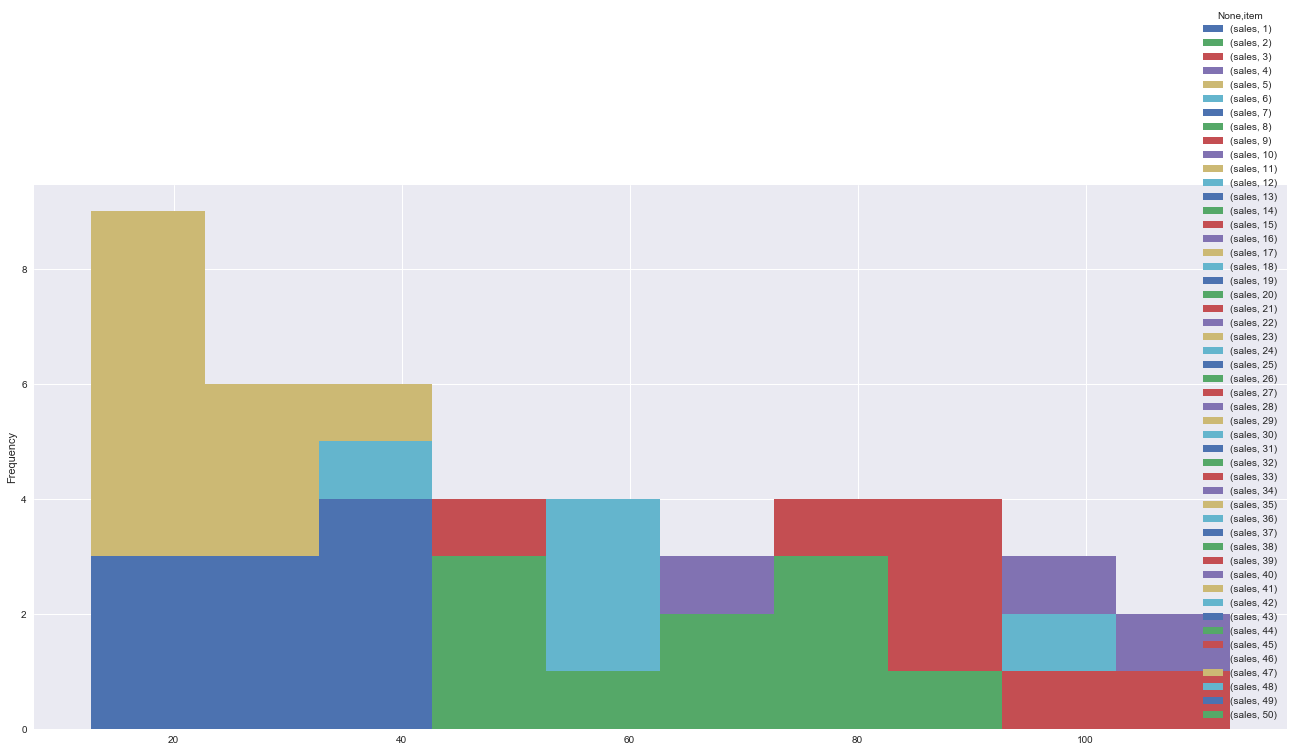

In [8]:
# Let us understand the sales data distribution across the stores
def sales_data_understanding(data):    
    store_df = data.copy()
    plt.figure(figsize=(20,10))
    sales_pivoted_df = pd.pivot_table(store_df, index='store', values=['sales','date'], columns='item', aggfunc=np.mean)
    sales_pivoted_df.plot(kind="hist",figsize=(20,10))
    # Pivoted dataframe
    display(sales_pivoted_df)
    return (store_df,sales_pivoted_df)

store_df,sales_pivoted_df = sales_data_understanding(train_df)

This pivoted dataframe has average sales per each store per each item.  
Let use this dataframe and produce some interesting visualizations!

In [9]:
# Let us calculate the average sales of all the items by each store
sales_across_store_df = sales_pivoted_df.copy()
sales_across_store_df['avg_sale'] = sales_across_store_df.apply(lambda r: r.mean(), axis=1)

In [10]:
# Scatter plot of average sales per store
sales_store_data = go.Scatter(
    y = sales_across_store_df.avg_sale.values,
    mode='markers',
    marker=dict(
        size = sales_across_store_df.avg_sale.values,
        color = sales_across_store_df.avg_sale.values,
        colorscale='Viridis',
        showscale=True
    ),
    text = sales_across_store_df.index.values
)
data = [sales_store_data]

sales_store_layout = go.Layout(
    autosize= True,
    title= 'Scatter plot of avg sales per store',
    hovermode= 'closest',
    xaxis= dict(
        title= 'Stores',
        ticklen= 10,
        zeroline= False,
        gridwidth= 1,
    ),
    yaxis=dict(
        title= 'Avg Sales',
        ticklen= 10,
        zeroline= False,
        gridwidth= 1,
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=sales_store_layout)
py.iplot(fig,filename='scatter_sales_store')

From the visualization, it is clear that the stores with ID 2 and 8 have higher average sales than the remaining stores and is a clear indication that they are doing good money!

Whereas store with ID 7 has very poor performance in terms of average sales.

## How does sales vary across items

In [11]:
def sales_insight(sales_pivoted_df):
    # Let us calculate the average sales of each of the item across all the stores
    sales_across_item_df = sales_pivoted_df.copy()
    # Aggregate the sales per item and add it as a new row in the same dataframe
    sales_across_item_df.loc[11] = sales_across_item_df.apply(lambda r: r.mean(), axis=0)
    # Note the 11th index row, which is the average sale of each of the item across all the stores
    #display(sales_across_item_df.loc[11:])
    avg_sales_per_item_across_stores_df = pd.DataFrame(data=[[i+1,a] for i,a in enumerate(sales_across_item_df.loc[11:].values[0])], columns=['item', 'avg_sale'])
    # And finally, sort by avg sale
    avg_sales_per_item_across_stores_df.sort_values(by='avg_sale', ascending=False, inplace=True)
    # Display the top 10 rows
    display(avg_sales_per_item_across_stores_df.head())
    return (sales_across_item_df,avg_sales_per_item_across_stores_df)

sales_across_item_df,avg_sales_per_item_across_stores_df = sales_insight(sales_pivoted_df)

,item,avg_sale
14,15,88.030778
27,28,87.881325
12,13,84.316594
17,18,84.275794
24,25,80.686418


Great! Let us visualize these average sales per item!

In [12]:
avg_sales_per_item_across_stores_sorted = avg_sales_per_item_across_stores_df.avg_sale.values
# Scatter plot of average sales per item
sales_item_data = go.Bar(
    x=[i for i in range(0, 50)],
    y=avg_sales_per_item_across_stores_sorted,
    marker=dict(
        color=avg_sales_per_item_across_stores_sorted,
        colorscale='Blackbody',
        showscale=True
    ),
    text = avg_sales_per_item_across_stores_df.item.values
)
data = [sales_item_data]

sales_item_layout = go.Layout(
    autosize= True,
    title= 'Scatter plot of avg sales per item',
    hovermode= 'closest',
    xaxis= dict(
        title= 'Items',
        ticklen= 55,
        zeroline= False,
        gridwidth= 1,
    ),
    yaxis=dict(
        title= 'Avg Sales',
        ticklen= 10,
        zeroline= False,
        gridwidth= 1,
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=sales_item_layout)
py.iplot(fig,filename='scatter_sales_item')

Amazing! The sales is uniformly distributed across all the items.   
Top items with highest average sale are 15, 28, 13, 18 and with least average sales are 5, 1, 41 and so on.

## Time-series visualization of the sales
Let us see how sales of a given item in a given store varies in a span of 5 years.

In [13]:
def Time_visualization(data):
    store_item_df = data.copy()
    # First, let us filterout the required data
    store_id = 10   # Some store
    item_id = 40    # Some item
    print('Before filter:', store_item_df.shape)
    store_item_df = store_item_df[store_item_df.store == store_id]
    store_item_df = store_item_df[store_item_df.item == item_id]
    print('After filter:', store_item_df.shape)
    #display(store_item_df.head())

    # Let us plot this now
    store_item_ts_data = [go.Scatter(
        x=store_item_df.date,
        y=store_item_df.sales)]
    py.iplot(store_item_ts_data)
    return store_item_df

store_item_df = Time_visualization(train_df)

Before filter: (913000, 4)
After filter: (1826, 4)


Woww! Clearly there is a pattern here! Feel free to play around with different store and item IDs.   
Almost all the items and store combination has this pattern!

The sales go high in June, July and August months. The sales will be lowest in December, January and February months. That's something!!

Let us make it more interesting. What if we aggregate the sales on a montly basis and compare different items and stores.   
This should help us understand how different item sales behave at a high level.

In [14]:
def sales_monthly(data):
    multi_store_item_df = data.copy()
    # First, let us filterout the required data
    store_ids = [1, 1, 1, 1]   # Some stores
    item_ids = [10, 20, 30, 40]    # Some items
    print('Before filter:', multi_store_item_df.shape)
    multi_store_item_df = multi_store_item_df[multi_store_item_df.store.isin(store_ids)]
    multi_store_item_df = multi_store_item_df[multi_store_item_df.item.isin(item_ids)]
    print('After filter:', multi_store_item_df.shape)
    #display(multi_store_item_df)
    # TODO Monthly avg sales

    # Let us plot this now
    multi_store_item_ts_data = []
    for st,it in zip(store_ids, item_ids):
        flt = multi_store_item_df[multi_store_item_df.store == st]
        flt = flt[flt.item == it]
        multi_store_item_ts_data.append(go.Scatter(x=flt.date, y=flt.sales, name = "Store:" + str(st) + ",Item:" + str(it)))
    py.iplot(multi_store_item_ts_data)
    return (multi_store_item_df)

multi_store_item_df = sales_monthly(train_df)

Before filter: (913000, 4)
After filter: (7304, 4)


Interesting!!   
Though the pattern remains same across different stores and items combinations, the **actual sale value consitently varies with the same scale**. 

As we can see in the visualization, item 10 has consistently highest sales through out the span of 5 years!   
This is an interesting behaviour that can be seen across almost all the items. 



# ARIMA

ARIMA is Autoregressive Integrated Moving Average Model, which is a component of SARIMAX, i.e. Seasonal ARIMA with eXogenous regressors.

(sources: [1](https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/), [2](https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-arima-in-python-3), [3](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases))


http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases

# LIGHTGBM

In [15]:
def split_data(train_data,test_data):
    train_data['date'] = pd.to_datetime(train_data['date'])
    test_data['date'] = pd.to_datetime(test_data['date'])

    train_data['month'] = train_data['date'].dt.month
    train_data['day'] = train_data['date'].dt.dayofweek
    train_data['year'] = train_data['date'].dt.year

    test_data['month'] = test_data['date'].dt.month
    test_data['day'] = test_data['date'].dt.dayofweek
    test_data['year'] = test_data['date'].dt.year

    col = [i for i in test_data.columns if i not in ['date','id']]
    y = 'sales'
    train_x, test_x, train_y, test_y = train_test_split(train_data[col],train_data[y], test_size=0.2, random_state=2018)
    return (train_x, test_x, train_y, test_y,col)

train_x, test_x, train_y, test_y,col = split_data(train_df,test_df)

In [16]:
train_x.shape,train_y.shape,test_x.shape

((730400, 5), (730400,), (182600, 5))

In [23]:
%%time

def model(train_x,train_y,test_x,test_y,col):
    params = {
        'nthread': 10,
         'max_depth': 5,
#         'max_depth': 9,
        'task': 'train',
        'boosting_type': 'gbdt',
        'objective': 'regression_l1',
        'metric': 'mape', # this is abs(a-e)/max(1,a)
#         'num_leaves': 39,
        'num_leaves': 64,
        'learning_rate': 0.2,
       'feature_fraction': 0.9,
#         'feature_fraction': 0.8108472661400657,
#         'bagging_fraction': 0.9837558288375402,
       'bagging_fraction': 0.8,
        'bagging_freq': 5,
        'lambda_l1': 3.097758978478437,
        'lambda_l2': 2.9482537987198496,
#       'lambda_l1': 0.06,
#       'lambda_l2': 0.1,
        'verbose': 1,
        'min_child_weight': 6.996211413900573,
        'min_split_gain': 0.037310344962162616,
        }
    
    lgb_train = lgb.Dataset(train_x,train_y)
    lgb_valid = lgb.Dataset(test_x,test_y)
    model = lgb.train(params, lgb_train, 3000, valid_sets=[lgb_train, lgb_valid],early_stopping_rounds=50, verbose_eval=50)
    y_test = model.predict(test_df[col])
    return y_test,model

Wall time: 3 ms


In [24]:
%%time
y_test, model = model(train_x,train_y,test_x,test_y,col)

Training until validation scores don't improve for 50 rounds.
[50]	training's mape: 0.18758	valid_1's mape: 0.187771
[100]	training's mape: 0.153659	valid_1's mape: 0.15402
[150]	training's mape: 0.146416	valid_1's mape: 0.146833
[200]	training's mape: 0.140941	valid_1's mape: 0.141614
[250]	training's mape: 0.137457	valid_1's mape: 0.138224
[300]	training's mape: 0.135228	valid_1's mape: 0.136131
[350]	training's mape: 0.133971	valid_1's mape: 0.135038
[400]	training's mape: 0.133425	valid_1's mape: 0.134564
[450]	training's mape: 0.132862	valid_1's mape: 0.134069
[500]	training's mape: 0.132523	valid_1's mape: 0.133813
[550]	training's mape: 0.132242	valid_1's mape: 0.133626
[600]	training's mape: 0.132026	valid_1's mape: 0.133456
[650]	training's mape: 0.131832	valid_1's mape: 0.133329
[700]	training's mape: 0.131673	valid_1's mape: 0.133211
[750]	training's mape: 0.131548	valid_1's mape: 0.133133
[800]	training's mape: 0.131445	valid_1's mape: 0.133077
[850]	training's mape: 0.1313

In [26]:
sample_df['sales'] = y_test
sample_df.to_csv('lgb_bayasian_param_local.csv', index=False)
sample_df['sales'].head()

0    12.096061
1    13.483620
2    14.597619
3    14.638576
4    15.240216
Name: sales, dtype: float64

In [20]:
def average(df1):
    avg  = df1
    df2 = pd.read_csv("../input/private/sub_val-0.132358565029612.csv")
    avg['sales'] = (df1["sales"]*0.4 + df2["sales"]*0.6)
    return avg

avg = average(sample_df)
avg.to_csv("Submission.csv", index=False)

FileNotFoundError: File b'../input/private/sub_val-0.132358565029612.csv' does not exist